<div>
Olá, Suiane!

Meu nome é Luiz. Fico feliz em revisar seu projeto. Ao longo do texto farei algumas observações sobre melhorias no código e também farei comentários sobre suas percepções sobre o assunto. Estarei aberto a feedbacks e discussões sobre o tema.

**Peço que mantenha e não altere os comentários que eu fizer por aqui para que possamos nos localizar posteriormente, ok?**

Mais uma coisa, vamos utilizar um código de cores para você entender o meu feedback no seu notebook. Funciona assim:

<div class="alert alert-block alert-success">
<b> Comentário do revisor: </b> <a class="tocSkip"></a>

Sucesso. Tudo foi feito corretamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentário do revisor: </b> <a class="tocSkip"></a>

Alerta não crítico, mas que pode ser corrigido para melhoria geral no seu código/análise.
</div>

<div class="alert alert-block alert-danger">

<b>Comentário do revisor: </b> <a class="tocSkip"></a>
    
Erro que precisa ser arrumado, caso contrário seu projeto **não** será aceito.
</div>

Você pode interagir comigo através dessa célula:
<div class="alert alert-block alert-info">
<b>Resposta do Aluno.</b> <a class="tocSkip"></a>
</div>

## Identificação do problema de negócio

O principal desafio da CallMeMaybe é permitir que supervisores identifiquem, de forma objetiva e escalável, operadores menos eficientes dentro das operações de telefonia de seus clientes. A ausência de critérios quantitativos claros dificulta a priorização de ações corretivas, como redistribuição de chamadas, treinamentos direcionados e ajustes operacionais, impactando negativamente custos, produtividade e a experiência do cliente final.

No setor de telefonia virtual e call centers, métricas como Tempo Médio de Atendimento (TMA), Tempo Médio de Espera (TME) e Taxa de Abandono são amplamente utilizadas para avaliar eficiência operacional e qualidade do serviço. No contexto deste projeto, essas métricas são particularmente relevantes, pois estão diretamente associadas à capacidade do operador de atender chamadas de forma eficaz e em tempo adequado.

A partir dos dados disponíveis, o projeto tem como objetivo mensurar essas métricas por operador e utilizá-las para identificar padrões de ineficiência. Essa abordagem gera valor ao permitir decisões baseadas em dados, redução de gargalos operacionais, melhoria da produtividade dos operadores e aumento da satisfação dos clientes atendidos pelas organizações usuárias da CallMeMaybe.

## Descrição dos dados

O número de **linhas** e **colunas** do arquivo *telecom_dataset_new.csv* são:

- Linhas: 53902
- Colunas: 9

E do arquivo *telecom_clients.csv* são:

- Linhas: 732
- Colunas: 3

Valores **ausentes**:

- Arquivo *telecom_dataset_new.csv*: 117 na coluna internal e 8172 na coluna operator_id
- Arquivo *telecom_clients.csv*: sem valores ausentes

Valores **duplicados**:

- Arquivo *telecom_dataset_new.csv*: 4900
- Arquivo *telecom_clients.csv*: sem valores duplicados


**Tipos incorretos** dos dados:

A coluna date do arquivo *telecom_dataset_new.csv* está com tipo string, deve ser convertida para datetime, assim como a coluna date_start do arquivo *telecom_clients.csv*.

**Resumo estatístico** das variáveis do arquivo *telecom_dataset_new.csv*:

| Métrica | user_id | operator_id | calls_count | call_duration | total_call_duration |
|-------:|--------:|------------:|------------:|--------------:|--------------------:|
| count | 53902.000000 | 45730.000000 | 53902.000000 | 53902.000000 | 53902.000000 |
| mean  | 167295.344477 | 916535.993002 | 16.451245 | 866.684427 | 1157.133297 |
| std   | 598.883775 | 21254.123136 | 62.917170 | 3731.791202 | 4403.468763 |
| min   | 166377.000000 | 879896.000000 | 1.000000 | 0.000000 | 0.000000 |
| 25%   | 166782.000000 | 900788.000000 | 1.000000 | 0.000000 | 47.000000 |
| 50%   | 167162.000000 | 913938.000000 | 4.000000 | 38.000000 | 210.000000 |
| 75%   | 167819.000000 | 937708.000000 | 12.000000 | 572.000000 | 902.000000 |
| max   | 168606.000000 | 973286.000000 | 4817.000000 | 144395.000000 | 166155.000000 |


**Resumo estatístico** das variáveis do arquivo *telecom_clients.csv*:

| Métrica | user_id |
|-------:|--------:|
| count | 732.000000 |
| mean  | 167431.927596 |
| std   | 633.810383 |
| min   | 166373.000000 |
| 25%   | 166900.750000 |
| 50%   | 167432.000000 |
| 75%   | 167973.000000 |
| max   | 168606.000000 |


**Distribuição** da coluna total_call_duration do arquivo *telecom_dataset_new.csv*

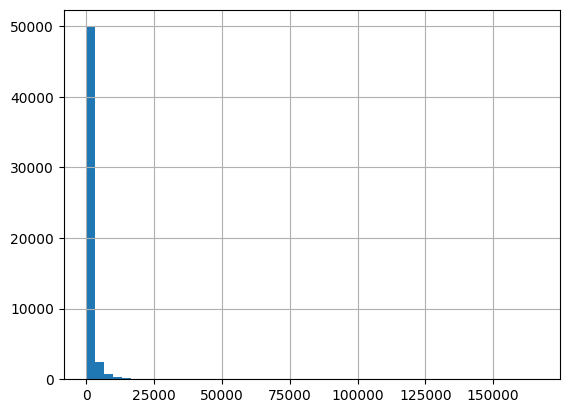

**Tabelas de frequência:**

Arquivo *telecom_dataset_new.csv*

| is_missed_call | count |
|----------------|-------|
| False          | 30334 |
| True           | 23568 |

| direction | count |
|-----------|-------|
| out       | 31917 |
| in        | 21985 |

| internal | count |
|----------|-------|
| False    | 47621 |
| True     | 6164  |

Arquivo *telecom_clients.csv*
| tariff_plan | count |
|-------------|-------|
| C           | 395   |
| B           | 261   |
| A           | 76    |


As **variáveis mais relevantes** no arquivo *telecom_dataset_new.csv*, são:

- call_duration: é uma variável que está sem o tempo de espera e será útil para obter o TME, fazendo a subtração com a variável total_call_duration.
- total_call_duration: será utilizada para calcular o TMA.
- is_missed_call: será utilizada para calcular a Taxa de abandono.

Para o arquivo *telecom_clients.csv*:

- tariff_plan: será utilizada para fazer uma análise de coort a respeito dos planos existentes.

## Hipóteses a serem validadas

**Hipótese 1 — Chamadas Perdidas:**

Operadores ineficientes perdem mais chamadas recebidas do que a média da empresa.

*Formulação estatística*

H₀ (nula):
A taxa média de chamadas perdidas de um operador é igual à taxa média geral.

H₁ (alternativa):
A taxa média de chamadas perdidas do operador é maior que a média geral.

*Métrica*

Proporção de chamadas perdidas (miss_rate)

*Teste recomendado*

Teste de proporções (z-test)

**Hipótese 2 — Tempo de Espera Excessivo**

Operadores ineficientes fazem clientes esperarem mais.

*Formulação*

H₀:
O tempo médio de espera do operador é igual ao tempo médio geral.

H₁:
O tempo médio de espera do operador é maior.

*Métrica*

avg_wait = total_call_duration - call_duration

*Teste*

Mann-Whitney U (robusto, não assume normalidade)

**Hipótese 3 — Baixa Atividade em Chamadas de Saída**

Operadores responsáveis por outbound produzem menos chamadas do que o esperado.

*Formulação*

H₀:
O número médio diário de chamadas de saída do operador é igual ao grupo.

H₁:
É menor que o grupo.

*Métrica*

Chamadas de saída por dia ativo

*Teste*

Mann-Whitney

## Indicadores-chave (KPIs)

**Tempo Médio de Espera (Average Waiting Time)**

$$
\text{AvgWait}_i =
\frac{
\sum_{j \in C^{in}_i}
\left(
\text{total\_call\_duration}_j -
\text{call\_duration}_j
\right)
}{
\sum_{j \in C^{in}_i}
\text{calls\_count}_j
}
$$

Interpretação:

- Mede o tempo médio que o cliente aguardou atendimento
- Quanto maior, pior a eficiência

**Taxa de Chamadas Internas Perdidas**

$$
\text{InternalMissRate}_i =
\frac{
\sum_{j \in C^{in,int}_i}
\mathbb{1}(j \text{ é perdida}) \cdot \text{calls\_count}_j
}{
\sum_{j \in C^{in,int}_i}
\text{calls\_count}_j
}
$$

Condições:

- internal = True
- direction = in

**Produtividade de Chamadas de Saída**

$$
\text{OutboundProductivity}_i =
\frac{
\sum_{j \in C^{out}_i}
\text{calls\_count}_j
}{
|D_i|
}
$$

Onde:
$$
{
|D_i| = \text{número de dias distintos com atividade}
}
$$

**Tempo Médio por Chamada de Saída**

$$
\text{AvgOutboundDuration}_i =
\frac{
\sum_{j \in C^{out}_i}
\text{call\_duration}_j
}{
\sum_{j \in C^{out}_i}
\text{calls\_count}_j
}
$$


## Ações a executar

Para validar as hipóteses e resolver o problema, será necessário realizar as seguintes ações:

**Limpeza e processamento de dados:**

1. Remoção de registros sem operador (20min)

- Problema: chamadas sem operator_id não podem ser atribuídas
- Ação: remover ou marcar como “não atribuídas”

2. Conversão e padronização de datas (30min)

- Converter date para formato datetime
- Criar colunas auxiliares: dia, semana, mês

3. Tratamento de valores inconsistentes (1h)

- total_call_duration < call_duration → erro lógico
- Duração negativa ou zero em chamadas atendidas

4. Segmentação estrutural dos dados (30min)

   Separar:
- inbound vs outbound
- chamadas internas vs externas

5. Agregação por operador (2h)

- Agrupar dados granulares por operator_id
- Calcular totais e médias básicas

6. Criação de variáveis derivadas (2h)

- Tempo de espera = total_call_duration − call_duration
- Número de dias ativos por operador


**Análise de dados:**

1. Análise da taxa de chamadas perdidas por operador (1h)

- Cálculo da proporção de chamadas perdidas
- Identificação de operadores acima da média

2. Comparação do tempo médio de espera (2h)

- Boxplots ou histogramas
- Identificação de operadores outliers

3. Análise de produtividade em chamadas de saída (2h)

- Comparar volume médio diário de chamadas
- Detectar operadores com baixa atividade

4. Teste de hipóteses estatísticas (5h)

- Testar se operadores “suspeitos” diferem do grupo
- Ex.: Mann-Whitney, teste de proporções

**Comunicação de resultados**

1. Dashboard em Tableau (3h)
2. Apresentação em pdf (2h)

## Stakeholders impactados

**1. Supervisores de Operação / Call Center**

📌 Principal stakeholder

Por que impacta

São responsáveis diretos pelo desempenho dos operadores

Tomam decisões diárias de:

- redistribuição de chamadas
- coaching
- escalas
- acompanhamento individual

Como os resultados ajudam

- Identificação objetiva de operadores ineficientes
- Redução de decisões subjetivas (“achismo”)
- Priorização de ações corretivas

**2. Gestores de Operações / Gerência**

📌 Stakeholder estratégico

Por que impacta

Precisam de visão agregada, não caso a caso

São cobrados por:

- SLAs
- eficiência operacional
- custo por chamada

Como os resultados ajudam

- Visão sistêmica dos gargalos
- Identificação de padrões por cliente ou plano
- Base quantitativa para decisões estruturais

**3. Equipe de Produto (CallMeMaybe)**

📌 Stakeholder técnico-estratégico

Por que impacta

A funcionalidade analisada é um recurso de produto

Precisa definir:

- critérios automáticos
- thresholds
- regras de negócio

Como os resultados ajudam

- KPIs claros e testáveis
- Algoritmo de score replicável
- Feature explicável e defensável

**4. Equipe de Customer Success / Suporte ao Cliente**

📌 Stakeholder tático

Por que impacta

Lida com reclamações de:

- chamadas não atendidas
- longos tempos de espera
- Atua como ponte entre cliente e operação

Como os resultados ajudam

- Diagnóstico rápido da causa do problema
- Diferencia falha humana vs estrutural
- Comunicação mais assertiva com o cliente

**5. Equipe Comercial / Vendas**

📌 Stakeholder indireto, mas crítico

Por que impacta

Problemas operacionais afetam:
- retenção
- upsell
- churn

Planos tarifários podem influenciar eficiência

Como os resultados ajudam

- Argumentação baseada em dados
- Identificação de clientes mal dimensionados
- Base para revisão de planos e propostas

**6. Clientes da CallMeMaybe (Organizações Usuárias)**

📌 Stakeholder final

Por que impacta

São os usuários indiretos do sistema

Sofrem com:

- chamadas perdidas
- tempo de espera elevado

Como os resultados ajudam

- Melhoria da qualidade de atendimento
- Transparência sobre desempenho da operação
- Apoio à gestão interna dos operadores

<div class="alert alert-block alert-success">
<b> Comentário geral do revisor</b> <a class="tocSkip"></a>

Obrigado por enviar o seu projeto e fazer os ajustes sugeridos. A sua decomposição está bem estruturada e organizada, parabéns! É sempre uma boa prática pensar em indicadores de negócio e entender como eles impactam na operação.

Como sugestões gerais, você poderia ter utilizado os dados de distribuição das chamadas para criar grupos de usuários com atributos similares. Por exemplo, você poderia usar o algoritmo `KMeans` ou algoritmo de agrupamento similar para gerar grupos coesos de usuários com base no comportamento geral. Além disso, na sua apresentação final considere sempre adicionar imagens/gráficos que suportem às suas conclusões. Além disso:

- Você pode analisar a correlação entre chamadas e atributos numéricos e/ou categóricos

<br>

Te desejo uma jornada de muito sucesso e aprendizado.
    
<br>   
    
Qualquer dúvida, pode contar comigo.   
    
<br>  
    
**Até breve!**

</div>